In [39]:
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
import astropy.units as u
from ctapipe.coordinates import CameraFrame, NominalFrame, GroundFrame, TiltedGroundFrame, AltAz
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib
import tables

# data_path_gamma = '/Users/nicolamarinello/simulations/gamma_20deg_0deg_srun800-4169___cta-prod3_desert-2150m-Paranal-HB9.h5'
# data_path_gamma = '/Users/nicolamarinello/simulations/gamma_20deg_0deg_srun1000-5606___cta-prod3_desert-2150m-Paranal-HB9_cone10.h5'
data_path_gamma = '/Users/nicolamarinello/simulations/proton_20deg_0deg_srun971-3870___cta-prod3_desert-2150m-Paranal-HB9.h5'

data_gamma = tables.open_file(data_path_gamma)

# acquire the data
data_ainfo = data_gamma.root.Array_Info
data_LST_gamma = data_gamma.root.LST
data_einfo_gamma = data_gamma.root.Event_Info

# array info data
ai_run_array_direction = [x['run_array_direction']
                          for x in data_ainfo.iterrows()]
ai_tel_id = [x['tel_id'] for x in data_ainfo.iterrows()]
ai_tel_type = [x['tel_type'] for x in data_ainfo.iterrows()]
ai_tel_x = [x['tel_x'] for x in data_ainfo.iterrows()]
ai_tel_y = [x['tel_y'] for x in data_ainfo.iterrows()]
ai_tel_z = [x['tel_z'] for x in data_ainfo.iterrows()]

# print(ai_run_array_direction)

# LST data
LST_event_index_gamma = [x['event_index'] for x in data_LST_gamma.iterrows()]
LST_image_charge_gamma = [x['image_charge'] for x in data_LST_gamma.iterrows()]
LST_image_peak_times_gamma = [x['image_peak_times'] for x in data_LST_gamma.iterrows()]
ei_mc_energy_gamma = [x['mc_energy'] for x in data_einfo_gamma.iterrows()]
ei_alt_gamma = [x['alt'] for x in data_einfo_gamma.iterrows()]
ei_az_gamma = [x['az'] for x in data_einfo_gamma.iterrows()]

#e_idx_gamma = 3135
#e_idx_gamdi = 153
#e_idx_proto = 753

e_idx_gamma = np.argsort(-np.array(ei_mc_energy_gamma), axis=0)[550]

my_event_gamma = data_einfo_gamma[e_idx_gamma]

energy = my_event_gamma['mc_energy']
alt = my_event_gamma['alt']
az = my_event_gamma['az']

print('Energy: {} TeV'.format(energy))
print('Alt: {} rad'.format(alt))
print('Az: {} rad'.format(az))

my_indices_gamma = my_event_gamma['LST_indices']

img_charge_gamma = LST_image_charge_gamma[my_indices_gamma[0]]
img_time_gamma = LST_image_peak_times_gamma[my_indices_gamma[0]]

az_array = ai_run_array_direction[0][0]
alt_array = ai_run_array_direction[0][1]

if alt_array > 90:
    alt_array = 90
    
#point = HorizonFrame(alt=alt_array * u.deg, az=az_array * u.deg)
point = AltAz(alt=alt_array * u.rad, az=az_array * u.rad)
# Create coordinate objects for source position
#src = HorizonFrame(alt=alt * u.rad, az=az * u.rad)
src = AltAz(alt = alt * u.rad, az = az * u.rad)
# And transform into nominal system (where we store our templates)
#source_direction= src.transform_to(NominalFrame(array_direction=point))
source_direction= src.transform_to(NominalFrame(origin=point))

print('Point: ', point)
print('Src: ', src)
print('Source direction: ', source_direction)

Energy: 7.51483154296875 TeV
Alt: 1.3464692831039429 rad
Az: 6.273955821990967 rad
Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.47118945, 77.14700717)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.11855376, 7.1475216)>


[-1, 1, 1, 4, 4, 6, 7, 8, 23, 23, 23, 23, 24, 24, 24, 25, 25, 26, 28, 33, 42, 44, 44, 44, 45, 45, 45, 50, 51, 55, 55, 62, 62, 62, 62, 65, 65, 65, 65, 72, 72, 72, 72, 74, 74, 75, 75, 91, 91, 91, 91, 93, 93, 93, 93, 100, 115, 115, 128, 128, 129, 129, 129, 129, 130, 130, 133, 134, 134, 136, 136, 136, 137, 137, 139, 139, 142, 145, 151, 151, 151, 151, 153, 174, 174, 175, 179, 179, 180, 183, 184, 184, 184, 187, 187, 187, 187, 193, 194, 194, 196, 196, 200, 205, 210, 214, 214, 226, 226, 230, 234, 235, 238, 238, 239, 242, 243, 243, 246, 248, 248, 269, 275, 275, 284, 294, 294, 294, 294, 299, 304, 305, 306, 317, 318, 318, 318, 318, 323, 333, 333, 345, 345, 346, 346, 346, 349, 351, 351, 351, 356, 356, 364, 364, 365, 365, 367, 382, 386, 394, 394, 394, 394, 410, 410, 411, 411, 428, 428, 428, 429, 429, 429, 429, 430, 430, 431, 433, 433, 433, 434, 434, 434, 438, 438, 438, 438, 441, 441, 441, 444, 444, 450, 450, 452, 465, 471, 472, 474, 474, 477, 479, 480, 486, 491, 502, 504, 505, 506, 510, 513, 513, 5

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (349.77939691, 68.40183786)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-3.74583665, -1.28358132)>
Source direction:  -3.7458366534801684
Source direction:  -1.2835813190337129

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressur

    (12.44679887, 70.28431313)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (4.17001795, 0.71122893)>
Source direction:  4.1700179518251765
Source direction:  0.7112289305505205

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (12.44679887, 70.28431313)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.9

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (355.17609329, 69.58498372)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.68094896, -0.34849131)>
Source direction:  -1.6809489556848576
Source direction:  -0.3484913059847627

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (355.17609329, 69.58498372)>
Source direction:  <NominalFra

    (14.7069631, 63.16595827)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (6.61744296, -6.03271507)>
Source direction:  6.61744296223859
Source direction:  -6.032715073724156

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (14.7069631, 63.16595827)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.9999

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (5.29863707, 68.40948767)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.94801252, -1.50582365)>
Source direction:  1.9480125155719255
Source direction:  -1.5058236458091467

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.

Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.62581295, 1.41409983)>
Source direction:  -1.6258129530300867
Source direction:  1.4140998325135394

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (354.91247531, 71.34623679)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, loca


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (358.89586896, 69.23391882)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.391487, -0.76253613)>
Source direction:  -0.39148699920738345
Source direction:  -0.7625361319348266

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressur

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (1.28396127, 69.66272493)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.44620995, -0.33257647)>
Source direction:  0.4462099518955909
Source direction:  -0.33257646819387787

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.64161633, 72.11979669)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.11010848, 2.12012062)>
Source direction:  -0.11010847515732583
Source direction:  2.120120616315719

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.64161633, 72.11979669)>
Source direction:  <NominalFrame

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (12.2457181, 66.44548726)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (4.86929174, -3.06414369)>
Source direction:  4.869291744266356
Source direction:  -3.0641436900813113

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0

    (0.75202166, 9.14260337)>
Source direction:  0.7520216627891401
Source direction:  9.142603370820327

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (3.93593237, 79.1183227)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.75202166, 9.14260337)>
Source direction:  0.7520216627891401
Source direction:  9.142603370820327

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (357.45013648, 70.45907718)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.85265797, 0.47690868)>
Source direction:  -0.8526579706175007
Source direction:  0.4769086845756334

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure

    (1.98334766, 0.93486396)>
Source direction:  1.9833476618519217
Source direction:  0.9348639642607687

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (6.05110535, 70.83637683)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.98334766, 0.93486396)>
Source direction:  1.9833476618519217
Source direction:  0.9348639642607687

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): 

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (357.7218414, 68.79295498)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.82408879, -1.19164774)>
Source direction:  -0.824088787687299
Source direction:  -1.1916477434893096

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (347.3564556, 70.95354872)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-4.0972989, 1.37969852)>
Source direction:  -4.097298899196244
Source direction:  1.3796985153697194

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.

    (-8.55821088, 0.78694711)>
Source direction:  -8.558210879864548
Source direction:  0.7869471072374882

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (335.41774938, 69.04139628)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-8.55821088, 0.78694711)>
Source direction:  -8.558210879864548
Source direction:  0.7869471072374882

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micro

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (351.87741245, 68.36171733)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-2.98744201, -1.43904152)>
Source direction:  -2.987442010377544
Source direction:  -1.4390415215409467

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.01903093, 68.93902541)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.35256742, -1.05813805)>
Source direction:  -0.35256741598833574
Source direction:  -1.058138052574729

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressur

    (353.86158241, 69.95957178)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-2.09998177, 0.06535694)>
Source direction:  -2.09998177224786
Source direction:  0.06535693622008291

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (353.86158241, 69.95957178)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 6


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (5.18654, 70.61602809)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.71943088, 0.68919689)>
Source direction:  1.7194308837883303
Source direction:  0.6891968857339921

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hP


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (5.71832487, 72.68156609)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.70164385, 2.7614124)>
Source direction:  1.7016438463136245
Source direction:  2.7614124035565433

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 

    (354.65915726, 67.63596192)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-2.0312218, -2.27502801)>
Source direction:  -2.031221804899609
Source direction:  -2.2750280094799344

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (354.65915726, 67.63596192)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (357.28703156, 72.22827376)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.8284232, 2.24670698)>
Source direction:  -0.8284231984966851
Source direction:  2.24670697623124

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0

Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (356.47784539, 68.78869977)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.27391539, -1.17449666)>
Source direction:  -1.273915385468375
Source direction:  -1.1744966554443863

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (14.00104939, 66.78349284)>
Source direction:  <NominalFrame Coordinate (origin=<Al

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (353.04704137, 69.5729216)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-2.4214866, -0.28888314)>
Source direction:  -2.421486602943018
Source direction:  -0.2888831439197493

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (353.04704137, 69.5729216)>
Source direction:  <NominalFrame C


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (354.58336948, 68.88435657)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.9491342, -1.02901674)>
Source direction:  -1.9491341970447937
Source direction:  -1.0290167403591892

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressur

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (8.47248937, 64.33910474)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (3.67445019, -5.40525756)>
Source direction:  3.6744501879171554
Source direction:  -5.405257557817504

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (8.47248937, 64.33910474)>
Source direction:  <NominalFrame Coor


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (2.18737683, 69.00605688)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.78361854, -0.9798855)>
Source direction:  0.7836185435155559
Source direction:  -0.9798854976127591

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0.87945014, 71.13849658)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.28435646, 1.14054767)>
Source direction:  0.28435645847622615
Source direction:  1.1405476684920632

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.02001448, 72.80453682)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.29005057, 2.80686811)>
Source direction:  -0.29005057304005505
Source direction:  2.8068681052034234

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (13.58000921, 71.90142871)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (4.18657983, 2.36935522)>
Source direction:  4.186579827232722
Source direction:  2.369355216370651

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 

    (0.88609098, 0.25332292)>
Source direction:  0.8860909842202583
Source direction:  0.25332291701945514

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (2.62099822, 70.23427516)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.88609098, 0.25332292)>
Source direction:  0.8860909842202583
Source direction:  0.25332291701945514

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron)


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.50779927, 70.5982696)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.16351112, 0.5989299)>
Source direction:  -0.16351111841373545
Source direction:  0.5989299006835195

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=

    (-0.0381483, 0.25278647)>
Source direction:  -0.038148298669710166
Source direction:  0.25278647083580696

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.88709333, 70.25275082)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.0381483, 0.25278647)>
Source direction:  -0.038148298669710166
Source direction:  0.25278647083580696

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (5.60886426, 67.69033022)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (2.12786874, -2.21173969)>
Source direction:  2.1278687429667147
Source direction:  -2.2117396919811414

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (352.27725173, 76.60519558)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.79626675, 6.71909294)>
Source direction:  -1.7962667500769112
Source direction:  6.719092936992869

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0

    (352.2510238, 70.0667716)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-2.63472239, 0.23438968)>
Source direction:  -2.634722391090707
Source direction:  0.234389683618963

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (352.2510238, 70.0667716)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.999

    (0.61005382, 71.36486954)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.19498892, 1.36584534)>
Source direction:  0.19498891504816396
Source direction:  1.365845342823523

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0.61005382, 71.36486954)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.999

    (2.10470422, 68.33456733)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.77719973, -1.65201725)>
Source direction:  0.7771997344988948
Source direction:  -1.6520172466745997

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (2.10470422, 68.33456733)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.9


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.70084773, 69.01326956)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.10715736, -0.98646723)>
Source direction:  -0.10715735824737269
Source direction:  -0.9864672342705427

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, press

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (348.14124434, 71.92896804)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-3.65772094, 2.28565838)>
Source direction:  -3.6577209382305216
Source direction:  2.2856583834239284

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (348.14124434, 71.92896804)>
Source direction:  <NominalFrame

    (3.51853972, 70.51660103)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.17295023, 0.55045304)>
Source direction:  1.1729502258860645
Source direction:  0.5504530358002532

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (3.51853972, 70.51660103)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.999

Source direction:  0.9836745744797639

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (2.30037548, 70.96952453)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.75001624, 0.98367457)>
Source direction:  0.7500162437979057
Source direction:  0.9836745744797639

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obs


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (4.88562919, 71.11967941)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.57957426, 1.18299336)>
Source direction:  1.579574257771746
Source direction:  1.1829933563004718

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (3.6157331, 71.51831657)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.14592902, 1.55230282)>
Source direction:  1.1459290182337034
Source direction:  1.55230282013027

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hP

Source direction:  -1.9136960245471566
Source direction:  4.37714503212717

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (8.77066811, 70.73483923)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (2.88411779, 0.94258555)>
Source direction:  2.88411778620762
Source direction:  0.9425855515873511

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.9999

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (349.30587355, 63.57507978)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-4.76316843, -6.00631117)>
Source direction:  -4.763168434998781
Source direction:  -6.006311165856649

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (343.02860186, 70.29260498)>
Source direction:  <NominalFrame

Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.50236616, 1.70221134)>
Source direction:  -1.5023661564933155
Source direction:  1.7022113375689896

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (358.84794835, 69.87766415)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, loca

Source direction:  0.6598975368883093

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (350.85078038, 70.43045185)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-3.05317873, 0.65989754)>
Source direction:  -3.053178730796568
Source direction:  0.6598975368883093

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (

Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.33748167, 69.72031025)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.22962916, -0.27844186)>
Source direction:  -0.22962916050699186
Source direction:  -0.27844185522335

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.33748167, 69.72031025)>
Source direction:  <NominalFrame Coordinate (origin=<A

    (6.94445311, 70.17522817)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (2.3501053, 0.30918585)>
Source direction:  2.3501053012258586
Source direction:  0.3091858534471083

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (6.94445311, 70.17522817)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.9999

    (349.23481226, 69.22665833)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-3.79857819, -0.43725556)>
Source direction:  -3.798578191860415
Source direction:  -0.4372555583992154

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (1.67977073, 71.74186183)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 6


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (358.78038412, 67.51198715)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.46689946, -2.48334279)>
Source direction:  -0.46689946075647265
Source direction:  -2.4833427860243726

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, press

    (8.87499242, 68.95265163)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (3.1765771, -0.81581055)>
Source direction:  3.1765770991752924
Source direction:  -0.8158105527993657

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (8.87499242, 68.95265163)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (358.38128251, 71.6718319)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.50917806, 1.67859145)>
Source direction:  -0.5091780649483774
Source direction:  1.678591449816538

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (10.05307711, 66.2358551)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (4.04094439, -3.43037292)>
Source direction:  4.040944389131125
Source direction:  -3.4303729200145874

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0

    (-3.15838701, -0.8334735)>
Source direction:  -3.158387011262029
Source direction:  -0.8334735041870365

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (351.18220848, 68.9378028)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-3.15838701, -0.8334735)>
Source direction:  -3.158387011262029
Source direction:  -0.8334735041870365

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micr

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (355.81531704, 72.28148093)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.27359188, 2.32520091)>
Source direction:  -1.2735918779839248
Source direction:  2.3252009100683604

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (355.81531704, 72.28148093)>
Source direction:  <NominalFrame

    (10.20573184, 67.70926351)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (3.85584417, -1.96739294)>
Source direction:  3.8558441721573877
Source direction:  -1.9673929439074693

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (10.20573184, 67.70926351)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69

    (356.87120964, 70.24154931)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.0572509, 0.26868094)>
Source direction:  -1.057250904503495
Source direction:  0.2686809364186622

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (356.87120964, 70.24154931)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (4.67301906, 68.14322641)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.73889475, -1.79011006)>
Source direction:  1.7388947476991272
Source direction:  -1.7901100599124884

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (341.71660448, 68.52688496)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-6.59467312, -0.47797369)>
Source direction:  -6.5946731221356165
Source direction:  -0.4779736913830453

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressu

    (-0.71392632, -0.04307148)>
Source direction:  -0.7139263174577873
Source direction:  -0.04307148123585648

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (357.91773123, 69.94473661)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.71392632, -0.04307148)>
Source direction:  -0.7139263174577873
Source direction:  -0.04307148123585648

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1

    (4.53011507, 3.67690315)>
Source direction:  4.530115068069907
Source direction:  3.676903148457131

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (15.72268054, 73.08992944)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (4.53011507, 3.67690315)>
Source direction:  4.530115068069907
Source direction:  3.676903148457131

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az

    (-1.46453588, 1.95682974)>
Source direction:  -1.464535878893264
Source direction:  1.9568297372197236

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (355.28387368, 71.90016513)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.46453588, 1.95682974)>
Source direction:  -1.464535878893264
Source direction:  1.9568297372197236

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micro


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (17.6919197, 73.81207168)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (4.87535347, 4.52387179)>
Source direction:  4.875353465408346
Source direction:  4.523871790213179

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 h

Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.11354423, 0.90379321)>
Source direction:  -0.11354422508058941
Source direction:  0.9037932135137311

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.65298177, 70.90346977)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, loc


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (359.59926916, 68.31583212)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.14812895, -1.68368078)>
Source direction:  -0.14812894923101635
Source direction:  -1.6836807811254888

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, press


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (358.68265777, 68.62510308)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.48023071, -1.36970863)>
Source direction:  -0.4802307113976316
Source direction:  -1.3697086337712678

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressu

Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (4.9247935, 71.29326184)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.5781993, 1.35702829)>
Source direction:  1.5781993013872784
Source direction:  1.357028289982423

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (6.35890099, 72.56161431)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coord

Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (358.08791222, 64.14465608)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-0.83809052, -5.84220158)>
Source direction:  -0.8380905194779387
Source direction:  -5.842201578417691

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (358.08791222, 64.14465608)>
Source direction:  <NominalFrame Coordinate (origin=<A

Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.48308926, 0.87430176)>
Source direction:  -1.4830892595647471
Source direction:  0.874301758947819

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0.42326181, 68.82272095)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, locatio

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (1.13521341, 70.47861152)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.37933285, 0.48214321)>
Source direction:  0.37933284531004635
Source direction:  0.48214320632950436

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (7.52038832, 70.41903178)>
Source direction:  <NominalFrame Coo

    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (357.06980422, 68.51713828)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.07304676, -1.45707324)>
Source direction:  -1.0730467610774417
Source direction:  -1.457073235430469

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (357.06980422, 68.51713828)>
Source direction:  <NominalFram

    (353.81888006, 72.78168983)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.82875781, 2.87445574)>
Source direction:  -1.8287578073440456
Source direction:  2.8744557361546703

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (1.99234761, 69.07648979)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (353.42409513, 73.43609026)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.8744815, 3.53725925)>
Source direction:  -1.874481500976668
Source direction:  3.537259249364397

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (5.95626134, 71.84115912)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.85431897, 1.93179436)>
Source direction:  1.8543189651647292
Source direction:  1.9317943640337814

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (352.24187135, 69.8174697)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-2.66944178, -0.01250273)>
Source direction:  -2.6694417829668557
Source direction:  -0.0125027280109341

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (1.5315283, 68.63855172)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (0.55795783, -1.35444019)>
Source direction:  0.5579578254376637
Source direction:  -1.3544401870091185

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0

    (-1.09233023, -0.51755577)>
Source direction:  -1.0923302320731012
Source direction:  -0.5175557662498963

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (356.8862907, 69.45454759)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (-1.09233023, -0.51755577)>
Source direction:  -1.0923302320731012
Source direction:  -0.5175557662498963

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 

    (-3.4431505, 0.77052525)>
Source direction:  -3.4431505002020457
Source direction:  0.7705252540038657

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (4.42546569, 69.94626657)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.51616629, 0.00131019)>
Source direction:  1.516166290415287
Source direction:  0.0013101892248218018

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (10.46116725, 71.69803251)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (3.27057307, 1.97920677)>
Source direction:  3.270573067295932
Source direction:  1.9792067740150954

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0


Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (5.79735016, 71.724841)>
Source direction:  <NominalFrame Coordinate (origin=<AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>, obstime=None, location=None): (delta_az, delta_alt) in deg
    (1.81604851, 1.81123422)>
Source direction:  1.816048509887316
Source direction:  1.811234221309995

Point:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa, temperature=0.0 deg_C, relative_humidity=0.0, obswl=1.0 micron): (az, alt) in deg
    (0., 69.99999967)>
Src:  <AltAz Coordinate (obstime=None, location=None, pressure=0.0 hPa

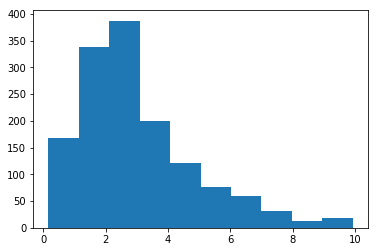

In [41]:
from ctapipe.instrument import CameraGeometry
from ctapipe.visualization import CameraDisplay
import astropy.units as u
from ctapipe.coordinates import CameraFrame, NominalFrame, GroundFrame, TiltedGroundFrame, AltAz
from astropy.coordinates import SkyCoord
import numpy as np
import matplotlib.pyplot as plt
import tables

# data_path = '/Users/nicolamarinello/simulations/gamma_20deg_0deg_srun800-4169___cta-prod3_desert-2150m-Paranal-HB9.h5'
# data_path = '/Users/nicolamarinello/simulations/gamma_20deg_0deg_srun1000-5606___cta-prod3_desert-2150m-Paranal-HB9_cone10.h5'
data_path = '/Users/nicolamarinello/simulations/proton_20deg_0deg_srun971-3870___cta-prod3_desert-2150m-Paranal-HB9.h5'

data = tables.open_file(data_path)

# acquire the data
data_ainfo = data.root.Array_Info
data_LST = data.root.LST
data_einfo = data.root.Event_Info

# array info data
ai_run_array_direction = [x['run_array_direction']
                          for x in data_ainfo.iterrows()]
ai_tel_id = [x['tel_id'] for x in data_ainfo.iterrows()]
ai_tel_type = [x['tel_type'] for x in data_ainfo.iterrows()]
ai_tel_x = [x['tel_x'] for x in data_ainfo.iterrows()]
ai_tel_y = [x['tel_y'] for x in data_ainfo.iterrows()]
ai_tel_z = [x['tel_z'] for x in data_ainfo.iterrows()]

# print(ai_run_array_direction)

# LST data
LST_event_index = [x['event_index'] for x in data_LST.iterrows()]
LST_image_charge = [x['image_charge'] for x in data_LST.iterrows()]
LST_image_peak_times = [x['image_peak_times'] for x in data_LST.iterrows()]
ei_mc_energy = [x['mc_energy'] for x in data_einfo.iterrows()]
ei_alt = [x['alt'] for x in data_einfo.iterrows()]
ei_az = [x['az'] for x in data_einfo.iterrows()]

#e_idx = 3135
#e_idx_gamdi = 153
#e_idx_proto = 753

# print(np.unique(LST_event_index))
# print(len(data_einfo))

print(LST_event_index)

theta = np.array([])

for j in range(1, len(LST_event_index)):

    idx = LST_event_index[j]
    
    alt = ei_alt[idx]
    az = ei_az[idx]

    az_array = ai_run_array_direction[0][0]
    alt_array = ai_run_array_direction[0][1]

    if alt_array > 90:
        alt_array = 90

    #point = HorizonFrame(alt=alt_array * u.deg, az=az_array * u.deg)
    point = AltAz(alt=alt_array * u.rad, az=az_array * u.rad)
    # Create coordinate objects for source position
    #src = HorizonFrame(alt=alt * u.rad, az=az * u.rad)
    src = AltAz(alt = alt * u.rad, az = az * u.rad)
    # And transform into nominal system (where we store our templates)
    #source_direction= src.transform_to(NominalFrame(array_direction=point))
    source_direction= src.transform_to(NominalFrame(origin=point))

    print('\nPoint: ', point)
    print('Src: ', src)
    print('Source direction: ', source_direction)
    print('Source direction: ', source_direction.delta_az.deg)
    print('Source direction: ', source_direction.delta_alt.deg)
    
    delta_az = source_direction.delta_az.deg
    delta_alt = source_direction.delta_alt.deg
    
    theta = np.append(theta, np.sqrt(delta_az**2+delta_alt**2))
    
plt.hist(theta)
plt.show()
